In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
import os
from PIL import Image
from keras.utils import np_utils
from scipy import misc

Using TensorFlow backend.


In [2]:
path = 'dataset/train/Train/'

In [3]:
images = os.listdir(path)

In [4]:
images[0]

'9538.jpg'

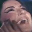

In [5]:
Image.open('dataset/train/Train/'+images[3]).resize((32,32))

In [6]:
train_labels = pd.read_csv('dataset/train/train.csv')

In [7]:
train_labels.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [8]:
outputs = list((train_labels['Class']).unique())

In [9]:
lb = LabelBinarizer()

In [10]:
lb.fit(outputs)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [11]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]

In [12]:
class data_Label_Combiner:

    def Data_combiner(self,images, labels, path, binarizer):
        for each in images:
            x_train.append(np.asarray(Image.open(path+each).resize((32,32)), dtype='int32'))
            y_train.append(np.asarray(binarizer.transform(labels[labels['ID']==each]['Class']),dtype='float32'))
        return x_train, y_train


In [13]:
dlc = data_Label_Combiner()

In [14]:
x_train, y_train = dlc.Data_combiner(images,train_labels,path,lb)

In [79]:
x_train=np.array(x_train)

In [80]:
y_train[50]

array([[0., 0., 1.]], dtype=float32)

In [81]:
outputs

['MIDDLE', 'YOUNG', 'OLD']

In [82]:
x_train, x_cross_val, y_train, y_cross_val = train_test_split(x_train,y_train, test_size = 0.1)

In [83]:
clasifier = Sequential()

In [84]:
clasifier.add(Convolution2D(32,3,3, input_shape=(32,32,3), activation='relu'))
clasifier.add(MaxPooling2D(pool_size=(2,2)))
clasifier.add(Convolution2D(32,3,3, activation='relu'))
clasifier.add(MaxPooling2D(pool_size=(2,2)))
clasifier.add(Flatten())

/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.
/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [85]:
clasifier.add(Dense(activation='relu', output_dim = 128))
clasifier.add(Dense(output_dim = 3, activation='softmax'))
            

/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.
/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=3)`
  


In [86]:
clasifier.compile(metrics=['accuracy'], loss='binary_crossentropy', optimizer='adam' )

In [87]:
train_generator = ImageDataGenerator(rotation_range=0.2,zoom_range=0.3, shear_range=0.3, vertical_flip=True,rescale=1.0/255)
val_generator = ImageDataGenerator(rescale=1.0/255)

In [88]:
train_generator.fit(x_train)
val_generator.fit(x_cross_val)

In [100]:
# for i,j in train_generator.flow(x_train[:2],y_train[:2]):
#     print (i,j)

In [55]:
clasifier.fit_generator(train_generator.flow(x_train,y_train), steps_per_epoch=len(x_train), validation_data=val_generator.flow(x_cross_val), validation_steps=len(y_cross_val),epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1


ValueError: Error when checking target: expected dense_4 to have 2 dimensions, but got array with shape (32, 1, 3)

In [59]:
np_utils.to_categorical(outputs,3)

ValueError: invalid literal for int() with base 10: 'MIDDLE'

In [62]:
le = LabelEncoder()
le.fit(outputs)

LabelEncoder()

In [63]:
le.transform(outputs)

array([0, 2, 1])

In [64]:
outputs

['MIDDLE', 'YOUNG', 'OLD']

In [65]:
np_utils.to_categorical(le.transform(outputs),3)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)